In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
# Pandas display options
pd.set_option('display.max_rows', 1200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)

In [16]:
# read each dataset in a dataframe
df_abide2 = pd.read_csv('/project/data/ABIDE2/phenotypics.csv')
df_adhd200 = pd.read_csv('/project/data/ADHD200/phenotypics.csv')
df_bhrc = pd.read_csv('/project/data/INPD/phenotypics.csv')
df_abcd = pd.read_csv('/project/data/ABCD/phenotypics.csv')

# ABIDE-II adjusts
df_abide2['dataset'] = 'ABIDE-II'
df_abide2['apd'] = df_abide2['DX_GROUP'].replace(2,0) # any psychiatric disorder
df_abide2['cbcl_tot'] = -999
df_abide2 = df_abide2.rename(columns={"SUB_ID": "subjectid", "SEX_BIN": "sex_bin", "AGE_AT_SCAN": "age_y", 
                                      "SITE_ID_BIN": "site"})
# ADHD-200 adjusts
df_adhd200['dataset'] = 'ADHD-200'
df_adhd200['apd'] = df_adhd200['DX'].replace([2,3],1) # any psychiatric disorder
df_adhd200['cbcl_tot'] = -999
df_adhd200 = df_adhd200.rename(columns={"SCANDIR_ID": "subjectid", "GENDER": "sex_bin", "AGE": "age_y",
                                       "SITE": "site"})
# BHRC adjusts
df_bhrc['dataset'] = 'BHRCS'
df_bhrc['gender'] = df_bhrc['gender'].replace(2,0)
df_bhrc['apd'] = df_bhrc['dcany'].replace(2,1) # any psychiatric disorder
df_bhrc['cbcl_tot'] = df_bhrc['cl_tot']
df_bhrc = df_bhrc.rename(columns={"gender": "sex_bin", "age": "age_y",
                                  "state": "site"})
# ABCD adjusts
df_abcd['dataset'] = 'ABCD'
df_abcd['cbcl_tot'] = df_abcd['cbcl_scr_syn_totprob_r']
df_abcd = df_abcd.rename(columns={"subjectkey": "subjectid", "age": "age_y", "diag_any": "apd",
                                 "scanner_serialnumber_bin": "site"})

# append data to the same dataframe
df = pd.DataFrame()
for dataset in ['df_abide2','df_adhd200','df_bhrc','df_abcd']:
    df = df.append(eval(dataset+"[['dataset','sex_bin','age_y','apd','cbcl_tot']]"), ignore_index=True)
    
# map gender to a string feature
df['gender'] = np.select([df['sex_bin']==0, df['sex_bin']==1], 
                         ['female', 'male'], 
                         'other')

# map gender to a string feature
df['psy'] = np.select([df['apd']==0, df['apd']==1], 
                         ['Typical development (TD)', 'Any psychiatric diag (APD)'], 
                         'other')

In [5]:
# get demographic info
list_demogs = []
for dataset in ['ABIDE-II','ADHD-200','BHRC','ABCD']:
    # prepare variables
    condition = df['dataset'] == dataset
    N = df[condition]['gender'].count()
    male_perc = np.round((df[condition & df['sex_bin']==1]['gender'].count() / N), 3)
    female_perc = np.round((1 - male_perc), 3)
    age_mean = np.round(df[condition]['age_y'].mean(), 1)
    age_sd = np.round(df[condition]['age_y'].std(), 1)
    age_range = str(np.round(df[condition]['age_y'].min(), 1)) \
                + '-' \
                + str(np.round(df[condition]['age_y'].max(),1))
    apd_perc = np.round((df[condition & df['apd']==1]['apd'].count() / N),3)
    # prepare dictionary
    demogs = {}
    demogs['dataset'] = dataset
    demogs['N'] = N
    demogs['male_perc'] = male_perc
    demogs['female_perc'] = female_perc
    demogs['age_mean'] = age_mean
    demogs['age_sd'] = age_sd
    demogs['age_range'] = age_range
    demogs['apd_perc'] = apd_perc
    # append dictionary to list
    list_demogs.append(demogs)

# create and show dataframe    
df_demog = pd.DataFrame(list_demogs)
blank_idx = [''] * len(df_demog)  # clear dataframes' indices
df_demog.index = blank_idx
df_demog

,dataset,N,male_perc,female_perc,age_mean,age_sd,age_range,apd_perc
,ABIDE-II,580,0.738,0.262,12.1,3.2,6.1-20.0,0.433
,ADHD-200,922,0.631,0.369,11.7,3.0,7.1-19.9,0.387
,BHRCS,737,0.571,0.429,9.9,1.9,5.8-14.3,0.305
,ABCD,11031,0.520,0.480,9.9,0.6,8.9-11.1,0.150


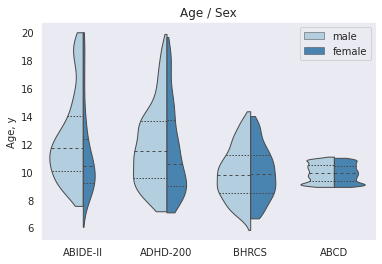

In [142]:
# SEX violin plot
sn.set_style('dark', {'axes.edgecolor': 'white'}) #{"grid.color": ".6", "grid.linestyle": ":"})
ax = sn.violinplot(x='dataset', y='age_y', hue='gender', hue_order=['male','female'],
                   data=df, palette='Blues', split=True,
                   scale="count", inner="quartile", cut=0, linewidth=1)
ax.set_title('Age / Sex')
ax.set_ylabel("Age, y")
ax.set_xlabel('')
ax.legend().set_title('')
# sn.set_theme(style='whitegrid')
# sns.axes_style()

plt.savefig('/project/sources/violin_sex.png', bbox_inches='tight')

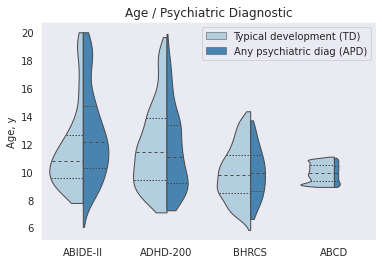

In [201]:
# plot seaborn violin plot
sn.set_style('dark', {'axes.edgecolor': 'white'}) #{"grid.color": ".6", "grid.linestyle": ":"})

plot_palette = ['#abd0e6', '#f6b48f']
ax = sn.violinplot(x='dataset', y='age_y', hue='psy', hue_order=['Typical development (TD)','Any psychiatric diag (APD)'],
                   data=df, palette='Blues', split=True,
                   scale="count", inner="quartile", cut=0, linewidth=1)
ax.set_title('Age / Psychiatric Diagnostic')
ax.set_ylabel("Age, y")
ax.set_xlabel('')
ax.legend().set_title('')
# sn.set_theme(style='whitegrid')
# sns.axes_style()

plt.savefig('/project/sources/violin_apd.png', bbox_inches='tight')


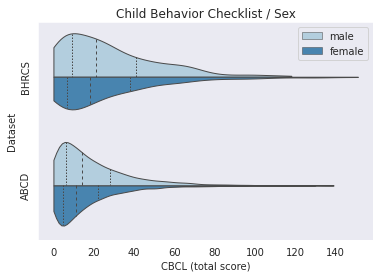

In [204]:
# plot seaborn violin plot
sn.set_style('dark', {'axes.edgecolor': 'white'}) #{"grid.color": ".6", "grid.linestyle": ":"})
ax = sn.violinplot(y='dataset', x='cbcl_tot', hue='gender', hue_order=['male','female'],
                   data=df[df['cbcl_tot']!=-999], palette='Blues', split=True,
                   scale="count", inner="quartile", cut=0, linewidth=1)
ax.set_title('Child Behavior Checklist / Sex')
ax.set_xlabel("CBCL (total score)")
ax.set_ylabel('Dataset')
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right', verticalalignment='center')
ax.legend().set_title('')
# sn.set_theme(style='whitegrid')
# sns.axes_style()



plt.savefig('/project/sources/violin_cbcl.png', bbox_inches='tight')

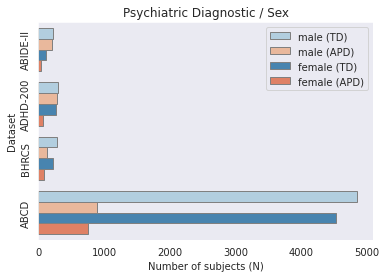

In [209]:
woman_td = (df['sex_bin'] == 0) & (df['apd'] == 0)
woman_apd = (df['sex_bin'] == 0) & (df['apd'] == 1)
man_td = (df['sex_bin'] == 1) & (df['apd'] == 0)
man_apd = (df['sex_bin'] == 1) & (df['apd'] == 1)
df['sex_diag'] = np.select([woman_td, woman_apd, man_td, man_apd],
                           ['female (TD)','female (APD)','male (TD)', 'male (APD)'],
                           'other')


# plot seaborn violin plot
sn.set_style('dark', {'axes.edgecolor': 'white'}) #{"grid.color": ".6", "grid.linestyle": ":"})


# ax = sn.barplot(data=df, x='dataset', y='apd', hue='gender', hue_order=['male','female'],
#                palette='Blues', edgecolor='gray', linewidth=1, ci=None)

plot_palette = ['#abd0e6', '#f6b48f', '#3787c0', '#f37651']
ax = sn.countplot(data=df,  y='dataset', hue='sex_diag', 
                  hue_order=['male (TD)', 'male (APD)', 'female (TD)','female (APD)'],
                  palette=plot_palette, edgecolor='gray', linewidth=1)

ax.set_title('Psychiatric Diagnostic / Sex')
ax.set_ylabel('Dataset')
ax.set_xlabel('Number of subjects (N)')
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right', verticalalignment='center')
ax.legend().set_title('')


plt.savefig('/project/sources/psy_sex.png', bbox_inches='tight')


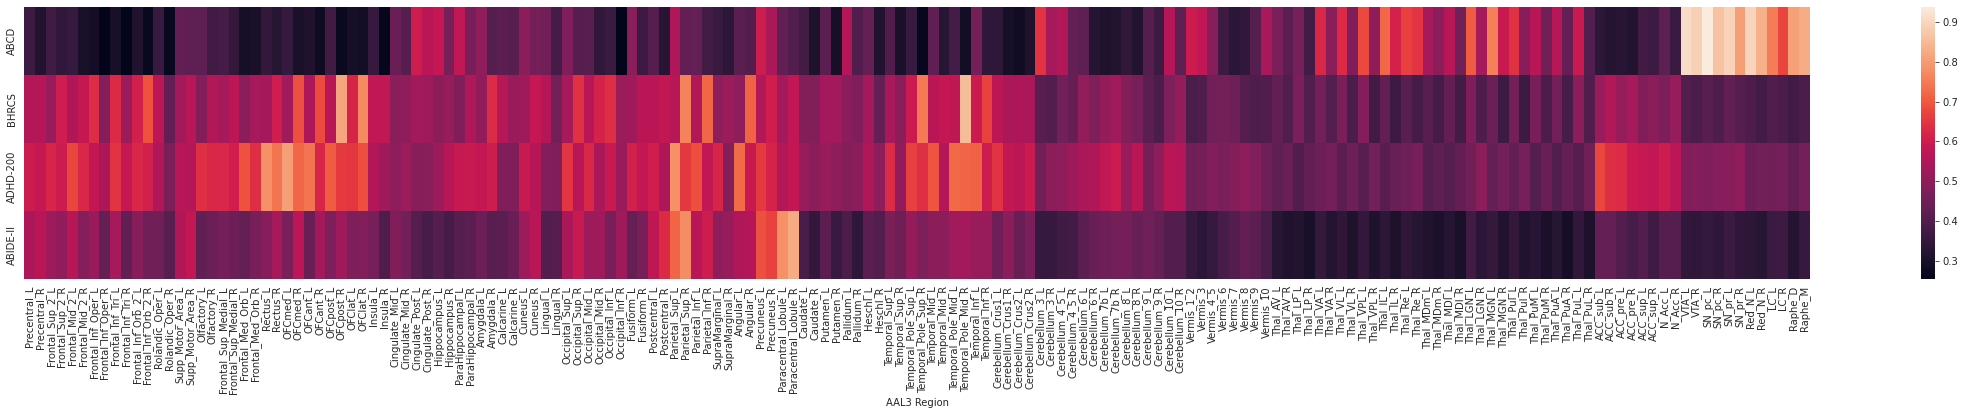

In [14]:
# ROIs Heatmap
sn.set_style('dark', {'axes.edgecolor': 'white'}) #{"grid.color": ".6", "grid.linestyle": ":"})

# Plot heatmap for models regions interest
rois_abcd = pd.read_csv('/project/data/results/ABCD/age/attention_rois.csv', usecols=['atlas_descr','atlas_id', 'grads_avg'])
rois_bhrcs = pd.read_csv('/project/data/results/INPD/age/attention_rois.csv', usecols=['atlas_descr','atlas_id', 'grads_avg'])
rois_adhd200 = pd.read_csv('/project/data/results/ADHD200/age/attention_rois.csv', usecols=['atlas_descr','atlas_id', 'grads_avg'])
rois_abide2 = pd.read_csv('/project/data/results/ABIDE2/age/attention_rois.csv', usecols=['atlas_descr','atlas_id', 'grads_avg'])

rois_abcd = rois_abcd.rename(columns={"grads_avg": "ABCD"})
rois_bhrcs = rois_bhrcs.rename(columns={"grads_avg": "BHRCS"})
rois_adhd200 = rois_adhd200.rename(columns={"grads_avg": "ADHD-200"})
rois_abide2 = rois_abide2.rename(columns={"grads_avg": "ABIDE-II"})

df_rois = rois_abcd.merge(rois_bhrcs, on=['atlas_id','atlas_descr'])
df_rois = df_rois.merge(rois_adhd200, on=['atlas_id','atlas_descr'])
df_rois = df_rois.merge(rois_abide2, on=['atlas_id','atlas_descr'])

# drop atlas_id=[35, 36, 81, 82]
# The original numbering in AAL2 for the anterior cingulate cortex (35, 36) and thalamus (81, 82) is left empty in AAL3 because finer parcellations of these regions are provided in AAL3
# https://doi.org/10.1016/j.neuroimage.2019.116189
df_rois = df_rois.drop(df_rois[df_rois['atlas_id'].isin([35,36,81,82])].index)
df_rois = df_rois.sort_values(by=['atlas_id'])
# drop atlas_id column as we will use atlas_descr
df_rois = df_rois.drop(columns='atlas_id')

df_rois = df_rois.rename(columns={"atlas_descr": "AAL3 Region"})
df_rois = df_rois.set_index('AAL3 Region')
df_rois = df_rois.T

plt.figure(figsize = (40,5))
sn.heatmap(df_rois)

plt.savefig('/project/sources/rois_heatmap.png', bbox_inches='tight')

In [9]:
# generate csv files to confound analysis
for dataset in ['ADHD200','ABIDE2','BHRC','ABCD']:
    N = 11 if dataset == 'ABCD' else 6
    task_list = ['AGE','ADHD'] if dataset == 'ADHD200' else ['AGE']
    for task in task_list:
        for i in np.arange(1,N,1):
            # csv filenames
            csv_predictions = '/project/data/results/predictions_csv/' + dataset \
                                + '_'+ task + '_k' + str(i).zfill(2) + '_predictions.csv'
            csv_voxsum = '/project/data/results/predictions_csv/' + dataset \
                            + '_voxels_sum.csv'
            csv_predconfounds = '/project/data/results/predictions_csv/pred_confounds/' + dataset \
                                    + '_' + task + '_k' + str(i).zfill(2) + '_predconfounds.csv'
            # selected columns
            if task == 'AGE':
                columns = ['predicted','target','sex_bin','site','voxels_sum']
                new_columns = ['prediction','target','cnf_cat_sex','cnf_cat_site','cnf_cont_voxsum']
            else:
                columns = ['predicted','target','age_y','sex_bin','site','voxels_sum']
                new_columns = ['prediction','target','cnf_cont_age','cnf_cat_sex','cnf_cat_site','cnf_cont_voxsum']               

            df_predconf = pd.read_csv(csv_predictions)
            df_voxsum = pd.read_csv(csv_voxsum)
            
            # adjust subjectid dtype for dataframe merge
            if dataset == 'ABCD':
                df_predconf['subjectid'] = df_predconf['subjectid'].str.replace("b'","").str.replace("'","").astype(str)
                df_voxsum['subjectid'] = df_voxsum['subjectid'].str.replace("b'","").str.replace("'","").astype(str)
            # merge dataframes and adjust column names
            df_predconf = pd.merge(df_predconf, df_voxsum, on='subjectid')
            df_predconf = pd.merge(df_predconf, eval('df_'+dataset.lower()), on='subjectid')
            df_predconf = df_predconf[columns]
            df_predconf.columns = new_columns
            # save csvs
            df_predconf.to_csv(csv_predconfounds, index=False, na_rep='')
            print(csv_predconfounds) 

/project/data/results/predictions_csv/pred_confounds/ADHD200_AGE_k01_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_AGE_k02_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_AGE_k03_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_AGE_k04_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_AGE_k05_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_ADHD_k01_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_ADHD_k02_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_ADHD_k03_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_ADHD_k04_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ADHD200_ADHD_k05_predconfounds.csv
/project/data/results/predictions_csv/pred_confounds/ABIDE2_AGE_k01_predconfounds.csv
/project/data/results/predictions_csv/p